# EDA

## Librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import calendar
from wordcloud import WordCloud, STOPWORDS

## Archivos CSV

In [6]:
mov_df = pd.read_csv("2_datasets_etl/movies_dataset_cleaned.csv")
cas_df = pd.read_csv("2_datasets_etl/cast_data.csv")
col_df = pd.read_csv("2_datasets_etl/collection_data.csv")
com_df = pd.read_csv("2_datasets_etl/companies_data.csv")
cou_df = pd.read_csv("2_datasets_etl/countries_data.csv")
cre_df = pd.read_csv("2_datasets_etl/crew_data.csv")
gen_df = pd.read_csv("2_datasets_etl/genres_data.csv")
spo_df = pd.read_csv("2_datasets_etl/spoken_data.csv")

## Análisis Movies

In [7]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45362 entries, 0 to 45361
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45362 non-null  int64  
 1   id                 45362 non-null  int64  
 2   original_language  45351 non-null  object 
 3   overview           44421 non-null  object 
 4   popularity         45362 non-null  float64
 5   release_date       45362 non-null  object 
 6   revenue            45362 non-null  int64  
 7   runtime            45116 non-null  float64
 8   status             45282 non-null  object 
 9   tagline            20394 non-null  object 
 10  title              45362 non-null  object 
 11  vote_average       45362 non-null  float64
 12  vote_count         45362 non-null  int64  
 13  return             45362 non-null  float64
 14  release_year       45362 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 5.2+ MB


In [8]:
mov_df

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,return,release_year
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,NaN,Toy Story,7.7,5415,12.451801,1995
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,4.043035,1995
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92,0.000000,1995
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34,5.090760,1995
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173,0.000000,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45357,0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0,104.0,Released,NaN,Robin Hood,5.7,26,0.000000,1991
45358,0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0,360.0,Released,NaN,Century of Birthing,9.0,3,0.000000,2011
45359,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6,0.000000,2003
45360,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0,87.0,Released,NaN,Satan Triumphant,0.0,0,0.000000,1917


Campos del dataset movies

* Numpericos
    * 'budget', presupuesto
    * 'popularity',
    * 'revenue', recaudación 
    * 'return', retorno inversión
    * 'vote_average', puntaje
    * 'vote_count', cantidad de votos 
* Categoricos
    * 'id', identificador de la película 
    * 'original_language', lenguaje original 
    * 'overview', introducción
    * 'release_date', fecha de lanzamiento
    * 'runtime', duración de la película en minutos 
    * 'status', estado
    * 'tagline', frase celebre 
    * 'title',titulo de la película 
    * 'release_year'

Para un sistema de recomedaciones deberiamos quedarnos con los siguientes campos

* Numpericos
    * 'popularity',
    * 'vote_average', puntaje
    * 'vote_count', cantidad de votos 
* Categoricos
    * 'overview', introducción
    * 'tagline', frase celebre 
    * 'title',titulo de la película 
    * 'release_date', fecha de lanzamiento
    * 'release_year'

In [5]:
# Resumen Estadístico Básico para Campos Numéricos:
numeric_columns = ['popularity', 'vote_average', 'vote_count']

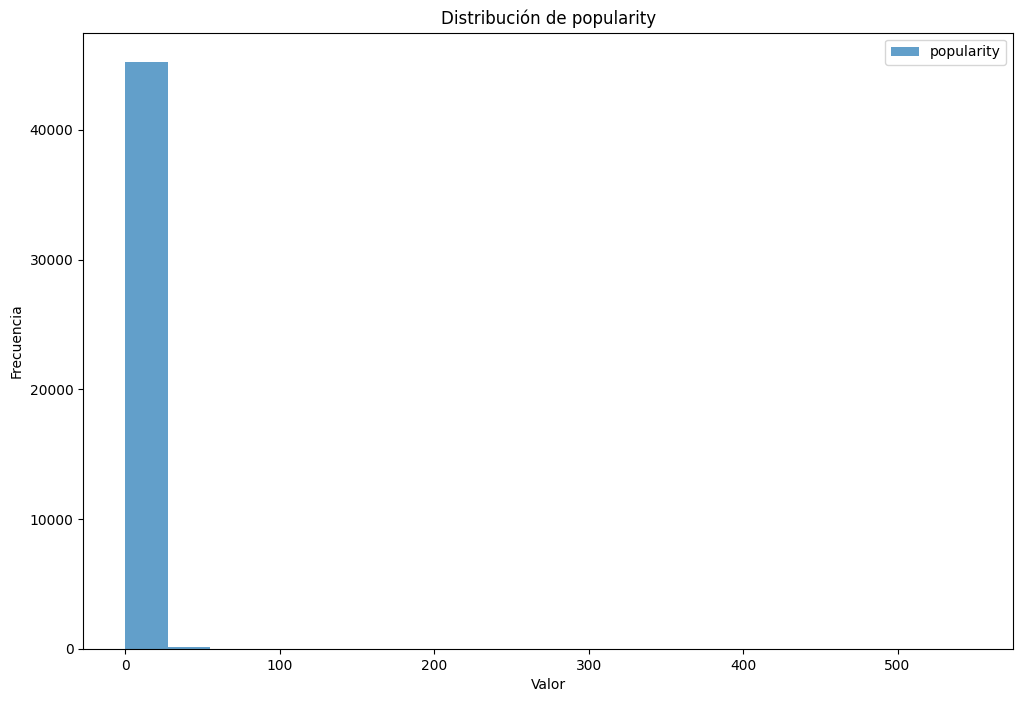

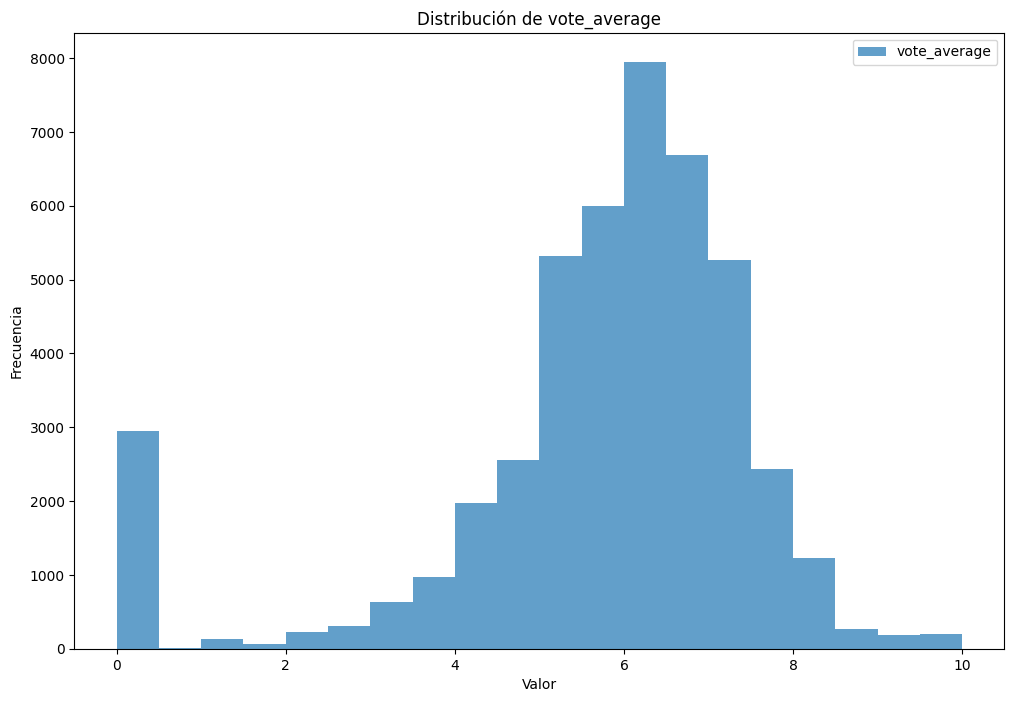

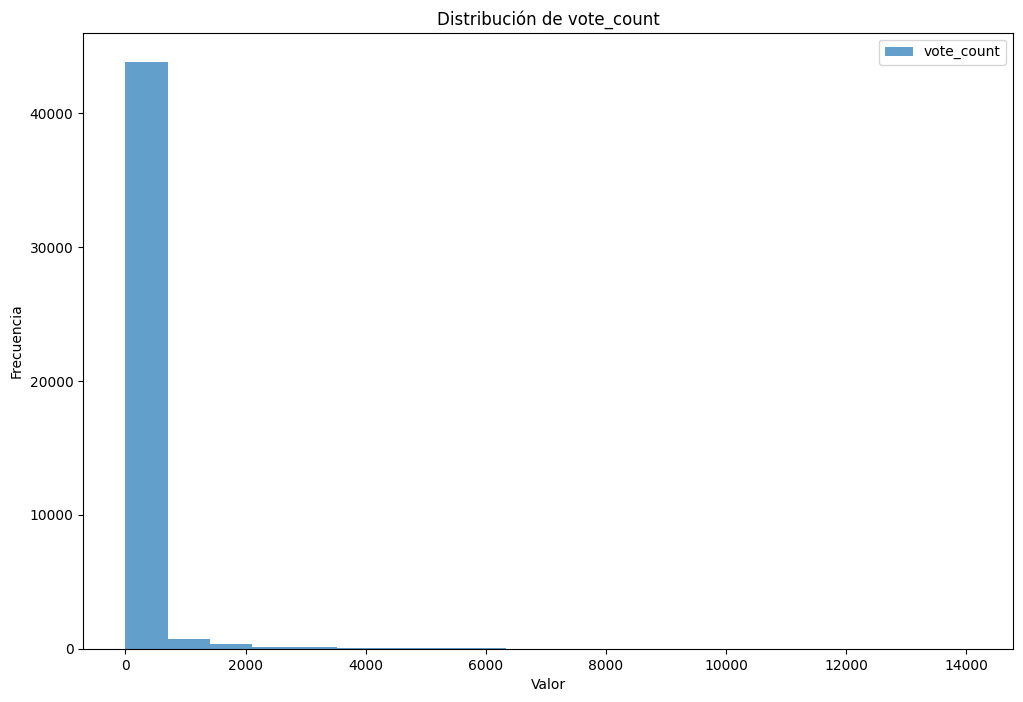

         popularity  vote_average    vote_count
count  45362.000000  45362.000000  45362.000000
mean       2.926390      5.624185    110.114920
std        6.010185      1.915252    491.815517
min        0.000000      0.000000      0.000000
25%        0.388850      5.000000      3.000000
50%        1.130454      6.000000     10.000000
75%        3.691065      6.800000     34.000000
max      547.488298     10.000000  14075.000000


In [6]:
# Histogramas y Distribuciones para Campos Numéricos:
for col in numeric_columns:
    plt.figure(figsize=(12, 8))
    plt.hist(mov_df[col], bins=20, alpha=0.7, label=col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {col}')
    plt.legend()
    plt.show()

print(mov_df[numeric_columns].describe())

'popularity'   : casi no se usa, casi todos los registros tiene este valor en cero 
'vote_average' : calificación de la película del 1- 10, casi todas las películas están calificadas
'vote_count'   : casi no se usa, casi todos los registros tiene este valor en cero 

De las variables numericas solo usaremos 'vote_average'

In [7]:
#Análisis de Campos Categóricos:
categorical_columns = ['overview', 'tagline', 'title']

In [8]:
# Mostrar los valores únicos en los campos categóricos
for col in categorical_columns:
    unique_values = mov_df[col].nunique()
    print(f"Valores únicos en '{col}': {unique_values}")

print('\n')

# Imprimir ejemplos de valores en cada columna categórica
for col in categorical_columns:
    example_value = mov_df[col].iloc[1]
    print(f"Ejemplo de '{col}': {example_value}")


Valores únicos en 'overview': 44235
Valores únicos en 'tagline': 20270
Valores únicos en 'title': 42198


Ejemplo de 'overview': When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.
Ejemplo de 'tagline': Roll the dice and unleash the excitement!
Ejemplo de 'title': Jumanji


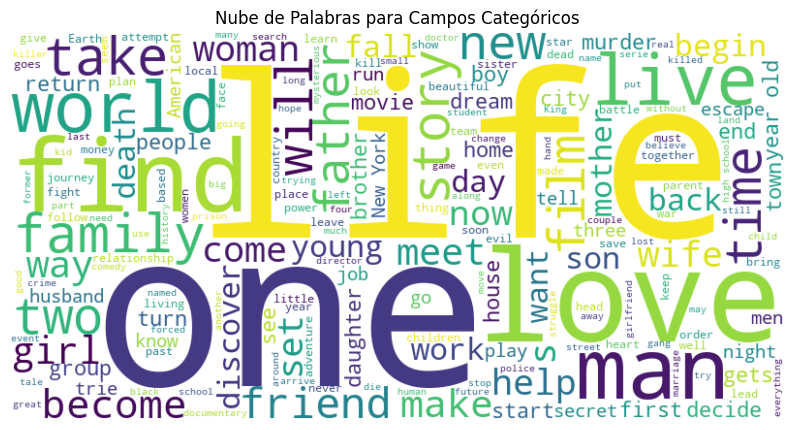

In [9]:
# Crear una nueva columna que contenga la concatenación de las columnas categóricas por fila
mov_df['combined_text'] = mov_df['overview'].fillna('') + ' ' + mov_df['tagline'].fillna('') + ' ' + mov_df['title']

# Concatenar los valores de la nueva columna para generar la nube de palabras
combined_text = ' '.join(mov_df['combined_text'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Campos Categóricos')
plt.show()


['overview', 'tagline', 'title']


Las tres variables  las utilizaremos 

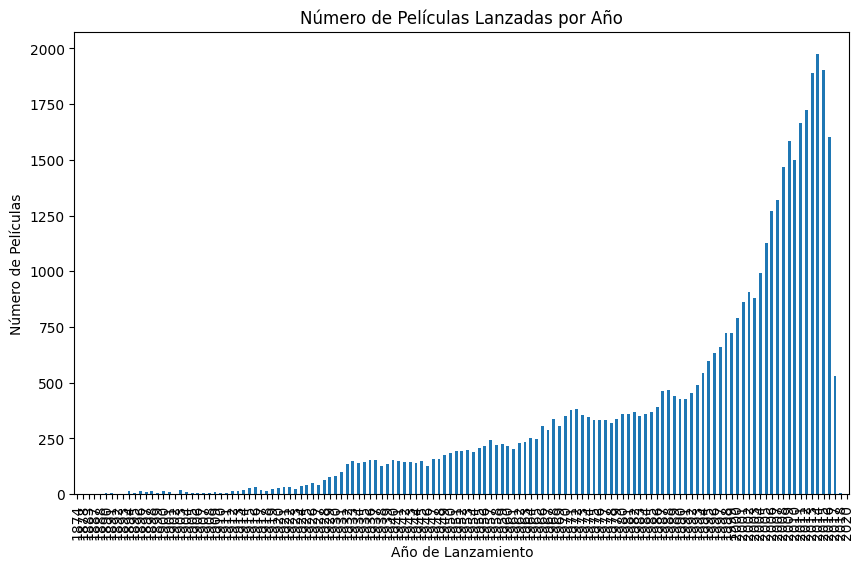

In [10]:
#Visualización de Fechas y Años de Lanzamiento:
# Convertir 'release_date' a formato de fecha
mov_df['release_date'] = pd.to_datetime(mov_df['release_date'], errors='coerce')

# Gráfico de lanzamientos por año
plt.figure(figsize=(10, 6))
mov_df['release_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Películas')
plt.title('Número de Películas Lanzadas por Año')
plt.show()


Mejor es agrupar por rango de año 

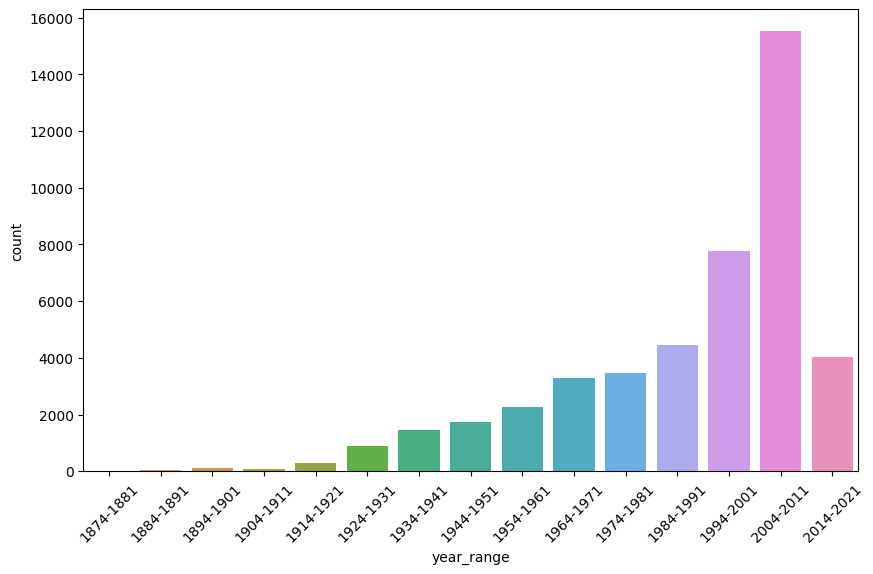

In [11]:
# Agrupar años
mov_df['release_year'] = pd.to_datetime(mov_df['release_year'], format='%Y')
bins = pd.date_range(start=min(mov_df['release_year']), end=max(mov_df['release_year']) + pd.DateOffset(years=7), freq='10Y')
labels = [f"{bin.year}-{(bin + pd.DateOffset(years=7)).year}" for bin in bins[:-1]]
mov_df['year_range'] = pd.cut(mov_df['release_year'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.countplot(data=mov_df, x='year_range', order=labels)
plt.xticks(rotation=45)
plt.show()

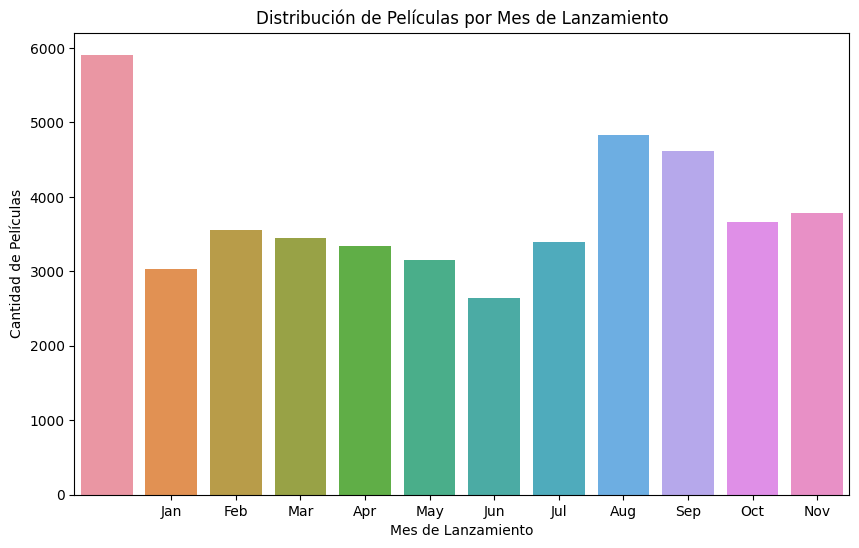

In [12]:
# Asegurarse de que 'release_date' esté en formato datetime
mov_df['release_date'] = pd.to_datetime(mov_df['release_date'])

# Crear una nueva columna con el mes de lanzamiento
mov_df['release_month'] = mov_df['release_date'].dt.month

# Visualizar la distribución de películas por mes de lanzamiento
plt.figure(figsize=(10, 6))
sns.countplot(data=mov_df, x='release_month')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Mes de Lanzamiento')
plt.xticks(range(1, 12), labels=[calendar.month_abbr[i] for i in range(1, 12)])  # Usar abreviaciones de los meses
plt.show()


In [13]:
mov_df['release_month'].describe() 

count    45362.000000
mean         6.459305
std          3.628008
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: release_month, dtype: float64

Nos quedamos con release_month y release_year

## Análisis de Cast

In [14]:
cas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562474 entries, 0 to 562473
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_movie      562474 non-null  int64 
 1   cast_id       562474 non-null  int64 
 2   character     536691 non-null  object
 3   credit_id     562474 non-null  object
 4   gender        562474 non-null  int64 
 5   id_cast       562474 non-null  int64 
 6   name_cast     562474 non-null  object
 7   order         562474 non-null  int64 
 8   profile_path  388618 non-null  object
dtypes: int64(5), object(4)
memory usage: 38.6+ MB


In [15]:
cas_df.columns

Index(['id_movie', 'cast_id', 'character', 'credit_id', 'gender', 'id_cast',
       'name_cast', 'order', 'profile_path'],
      dtype='object')

In [16]:
cas_df.describe()

,id_movie,cast_id,gender,id_cast,order
count,562474.000000,562474.000000,562474.000000,5.624740e+05,562474.000000
mean,93657.083213,51.563372,1.004887,4.497365e+05,11.845627
std,108906.493688,172.998891,0.895108,6.006127e+05,16.005299
min,2.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16914.000000,6.000000,0.000000,2.757800e+04,3.000000
50%,45007.000000,13.000000,1.000000,9.704300e+04,7.000000
75%,124054.000000,27.000000,2.000000,1.040850e+06,14.000000
max,469172.000000,1119.000000,2.000000,1.908262e+06,313.000000


In [17]:
cas_df

,id_movie,cast_id,character,credit_id,gender,id_cast,name_cast,order,profile_path
0,862,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,862,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,12898,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,862,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,7167,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,862,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,12899,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,862,18,Rex (voice),52fe4284c3a36847f8024fa5,2,12900,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg
...,...,...,...,...,...,...,...,...,...
562469,227506,2,NaN,52fe4ea59251416c7515d7d5,2,544742,Iwan Mosschuchin,0,NaN
562470,227506,3,NaN,52fe4ea59251416c7515d7d9,1,1090923,Nathalie Lissenko,1,NaN
562471,227506,4,NaN,52fe4ea59251416c7515d7dd,2,1136422,Pavel Pavlov,2,NaN
562472,227506,5,NaN,52fe4ea59251416c7515d7e1,0,1261758,Aleksandr Chabrov,3,NaN


Categoricas
- 'id_movie', identificador de película
- 'cast_id',  identificador del pérsonaje de la película
- 'character', personaje de la película
- 'credit_id', ¿?
- 'gender',  genero
- 'id_cast', identificador del actor
- 'name_cast', nombre del actor
- 'order', orden del protagonista 
- 'profile_path'  

De estos campos analizaremos 
- 'character', personaje de la película
- 'gender',  genero
- 'name_cast', nombre del actor


In [18]:
# Análisis de valores únicos y conteo de valores en las columnas categóricas
# categorical_columns = ['id_movie', 'cast_id', 'character', 'credit_id', 'gender', 'id_cast', 'name_cast', 'order', 'profile_path']
categorical_columns = ['character',  'gender','name_cast']

for col in categorical_columns:
    unique_values = cas_df[col].nunique()
    value_counts = cas_df[col].value_counts()
    print(f"\nColumna: {col}")
    print(f"Valores únicos: {unique_values}")
    print(f"Primeros valores y conteo:\n{value_counts.head()}\n")




Columna: character
Valores únicos: 319326
Primeros valores y conteo:
character
Himself     11437
Herself      3073
Doctor        663
Dancer        583
Narrator      562
Name: count, dtype: int64


Columna: gender
Valores únicos: 3
Primeros valores y conteo:
gender
2    226713
0    223964
1    111797
Name: count, dtype: int64


Columna: name_cast
Valores únicos: 202747
Primeros valores y conteo:
name_cast
Bess Flowers         241
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    123
Michael Caine        110
Name: count, dtype: int64



'character'  y 'name_cast' es muy disperso y variable para recomendar una película
'gender' no es determinate para recomebndar una película 

## Análisis de Collection

In [19]:
col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_movie         4491 non-null   int64 
 1   id_collection    4491 non-null   int64 
 2   name_collection  4491 non-null   object
 3   poster_path      3948 non-null   object
 4   backdrop_path    3263 non-null   object
dtypes: int64(2), object(3)
memory usage: 175.6+ KB


In [20]:
col_df.describe()

,id_movie,id_collection
count,4491.000000,4491.000000
mean,65594.092407,184108.678913
std,91384.524936,141605.338687
min,11.000000,10.000000
25%,11592.500000,86027.000000
50%,29095.000000,141615.000000
75%,67872.500000,294172.000000
max,461053.000000,480160.000000


In [21]:
col_df

,id_movie,id_collection,name_collection,poster_path,backdrop_path
0,862,10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,15602,119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
2,11862,96871,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg
3,710,645,James Bond Collection,/HORpg5CSkmeQlAolx3bKMrKgfi.jpg,/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg
4,21032,117693,Balto Collection,/w0ZgH6Lgxt2bQYnf1ss74UvYftm.jpg,/9VM5LiJV0bGb1st1KyHA3cVnO2G.jpg
...,...,...,...,...,...
4486,24568,37261,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
4487,19307,37261,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
4488,21251,37261,The Carry On Collection,/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg,/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
4489,460135,477208,DC Super Hero Girls Collection,NaN,NaN


In [22]:
col_df.columns

Index(['id_movie', 'id_collection', 'name_collection', 'poster_path',
       'backdrop_path'],
      dtype='object')

In [23]:
unique_values = col_df['name_collection'].nunique()
value_counts = col_df['name_collection'].value_counts()
print(f"\nColumna: {'name_collection'}")
print(f"Valores únicos: {unique_values}")
print(f"Primeros valores y conteo:\n{value_counts.head()}\n")



Columna: name_collection
Valores únicos: 1695
Primeros valores y conteo:
name_collection
The Bowery Boys                  29
Totò Collection                  27
James Bond Collection            26
Zatôichi: The Blind Swordsman    26
The Carry On Collection          25
Name: count, dtype: int64



Solo rescatar name_collection para recomendar una película

## Análisis de Companies

In [24]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70557 entries, 0 to 70556
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_movie        70557 non-null  int64 
 1   id_companies    70557 non-null  int64 
 2   name_companies  70557 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.6+ MB


In [25]:
com_df.describe()

,id_movie,id_companies
count,70557.000000,70557.000000
mean,99556.540046,16838.911122
std,113837.224338,22571.458186
min,2.000000,1.000000
25%,16759.000000,1992.000000
50%,47588.000000,7493.000000
75%,139725.000000,20319.000000
max,469172.000000,96067.000000


In [26]:
com_df

,id_movie,id_companies,name_companies
0,862,3,Pixar Animation Studios
1,8844,559,TriStar Pictures
2,8844,2550,Teitler Film
3,8844,10201,Interscope Communications
4,15602,6194,Warner Bros.
...,...,...,...
70552,30840,16323,20th Century Fox Television
70553,30840,38978,CanWest Global Communications
70554,111109,19653,Sine Olivia
70555,67758,6165,American World Pictures


In [27]:
com_df.columns

Index(['id_movie', 'id_companies', 'name_companies'], dtype='object')

In [28]:
unique_values = com_df['name_companies'].nunique()
value_counts = com_df['name_companies'].value_counts()
print(f"\nColumna: {'name_companies'}")
print(f"Valores únicos: {unique_values}")
print(f"Primeros valores y conteo:\n{value_counts.head()}\n")


Columna: name_companies
Valores únicos: 23538
Primeros valores y conteo:
name_companies
Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1076
Paramount Pictures                        1003
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
Name: count, dtype: int64



Solo rescatar name_companies para recomendar una película

## Análisis de Countries

In [29]:
cou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49430 entries, 0 to 49429
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_movie        49430 non-null  int64 
 1   iso_3166_1      49427 non-null  object
 2   name_countries  49430 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [30]:
unique_values = cou_df['name_countries'].nunique()
value_counts = cou_df['name_countries'].value_counts()
print(f"\nColumna: {'name_countries'}")
print(f"Valores únicos: {unique_values}")
print(f"Primeros valores y conteo:\n{value_counts.head()}\n")


Columna: name_countries
Valores únicos: 160
Primeros valores y conteo:
name_countries
United States of America    21155
United Kingdom               4095
France                       3940
Germany                      2254
Italy                        2169
Name: count, dtype: int64



Solo rescatar name_countries para recomendar una película

## Análisis de Crew

In [31]:
cre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464314 entries, 0 to 464313
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_movie      464314 non-null  int64 
 1   credit_id     464314 non-null  object
 2   department    464314 non-null  object
 3   gender        464314 non-null  int64 
 4   id_crew       464314 non-null  int64 
 5   job           464314 non-null  object
 6   name_crew     464314 non-null  object
 7   profile_path  95098 non-null   object
dtypes: int64(3), object(5)
memory usage: 28.3+ MB


In [32]:
cre_df

,id_movie,credit_id,department,gender,id_crew,job,name_crew,profile_path
0,862,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,862,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,862,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,862,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,862,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg
...,...,...,...,...,...,...,...,...
464309,67758,52fe4776c3a368484e0c8399,Sound,0,549356,Original Music Composer,Richard McHugh,NaN
464310,67758,52fe4776c3a368484e0c839f,Camera,2,58818,Director of Photography,João Fernandes,NaN
464311,227506,533bccebc3a36844cf0011a7,Directing,0,1085341,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg
464312,227506,58ebbc26925141281908aa0a,Production,2,1195656,Producer,Joseph N. Ermolieff,NaN


In [33]:
unique_values = cre_df['department'].nunique()
value_counts = cre_df['department'].value_counts()
print(f"\nColumna: {'department'}")
print(f"Valores únicos: {unique_values}")
print(f"Primeros valores y conteo:\n{value_counts.head()}\n")


Columna: department
Valores únicos: 12
Primeros valores y conteo:
department
Production    94498
Writing       74831
Directing     58134
Sound         50605
Art           40694
Name: count, dtype: int64



In [34]:
unique_values = cre_df['job'].nunique()
value_counts = cre_df['job'].value_counts()
print(f"\nColumna: {'job'}")
print(f"Valores únicos: {unique_values}")
print(f"Primeros valores y conteo:\n{value_counts.head()}\n")


Columna: job
Valores únicos: 456
Primeros valores y conteo:
job
Director      49048
Producer      43555
Writer        30431
Screenplay    25163
Editor        23800
Name: count, dtype: int64



In [35]:
unique_values = cre_df['name_crew'].nunique()
value_counts = cre_df['name_crew'].value_counts()
print(f"\nColumna: {'name_crew'}")
print(f"Valores únicos: {unique_values}")
print(f"Primeros valores y conteo:\n{value_counts.head()}\n")


Columna: name_crew
Valores únicos: 157614
Primeros valores y conteo:
name_crew
Cedric Gibbons     272
Avy Kaufman        184
Edith Head         165
Roger Corman       155
Ennio Morricone    153
Name: count, dtype: int64



department, job y name_crew para recomendar una película

## Análisis de Spoken

In [36]:
spo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53303 entries, 0 to 53302
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_movie     53303 non-null  int64 
 1   iso_639_1    53303 non-null  object
 2   name_spoken  52805 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [37]:
unique_values = spo_df['name_spoken'].nunique()
value_counts = spo_df['name_spoken'].value_counts()
print(f"\nColumna: {'name_spoken'}")
print(f"Valores únicos: {unique_values}")
print(f"Primeros valores y conteo:\n{value_counts.head()}\n")


Columna: name_spoken
Valores únicos: 74
Primeros valores y conteo:
name_spoken
English     28747
Français     4196
Deutsch      2625
Español      2413
Italiano     2367
Name: count, dtype: int64



name_spoken para recomendar una película

## Análisis de Genero

In [38]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91094 entries, 0 to 91093
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_movie     91094 non-null  int64 
 1   id_genres    91094 non-null  int64 
 2   name_genres  91094 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


In [39]:
unique_values = gen_df['name_genres'].nunique()
value_counts = gen_df['name_genres'].value_counts()
print(f"\nColumna: {'name_genres'}")
print(f"Valores únicos: {unique_values}")
print(f"Primeros valores y conteo:\n{value_counts.head()}\n")


Columna: name_genres
Valores únicos: 20
Primeros valores y conteo:
name_genres
Drama       20265
Comedy      13182
Thriller     7624
Romance      6735
Action       6596
Name: count, dtype: int64



name_genres para recomendar una película

## Conclusión

* Del dataset de movies
    * De las variables numéricas solo usaremos 'vote_average'
    * De las categóricas ['overview', 'tagline', 'title']
    * También creamos y nos quedamos con release_month y release_year

* Del dataset de Cast
    * Ningún campo de este dataset se utilizara para recomendar una película 
    * 'character' y 'name_cast' es muy disperso y variable para recomendar una película
    * 'gender' no es determinante para recomendar una película 

* Del dataset de Collection 
    * name_collection para recomendar una película

* Del dataset de Companies
    * name_companies para recomendar una película

* Del dataset de Countries
    * name_countries para recomendar una película

* Del dataset de Crew
    * department, job y name_crew para recomendar una película

* Del dataset de Spoken
    * name_spoken para recomendar una película

* Del dataset de Genero
    * name_genres para recomendar una película

In [40]:
## Análisi Bivariable

In [ ]:
# Combinar los datasets de películas y Collection en función del 'id_collection'
merged_df = pd.merge(mov_df, col_df,  left_on='id', right_on='id_movie', how='inner')

# Análisis bivariable entre 'vote_average' y 'name_collection'
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='name_collection', y='vote_average')
plt.xticks(rotation=90)
plt.title('Boxplot de "vote_average" vs. "name_collection"')
plt.show()

In [ ]:
# Análisis bivariable entre 'vote_average' y 'name_collection' usando un gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='name_collection', y='vote_average')
plt.xticks(rotation=90)
plt.title('Dispersión de "vote_average" vs. "name_collection"')
plt.show()

In [ ]:
# Combinar los datasets de películas y companies
merged_df = pd.merge(mov_df, com_df,  left_on='id', right_on='id_movie', how='inner')

# Análisis bivariable entre 'vote_average' y 'name_collection'
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='name_companies', y='vote_average')
plt.xticks(rotation=90)
plt.title('Boxplot de "vote_average" vs. "name_collection"')
plt.show()

In [ ]:
# Matriz de correlaciones
correlation_matrix = mov_df[['vote_average', 'release_month', 'release_year']].corr()

# Visualización de la matriz de correlaciones como un mapa de calor
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

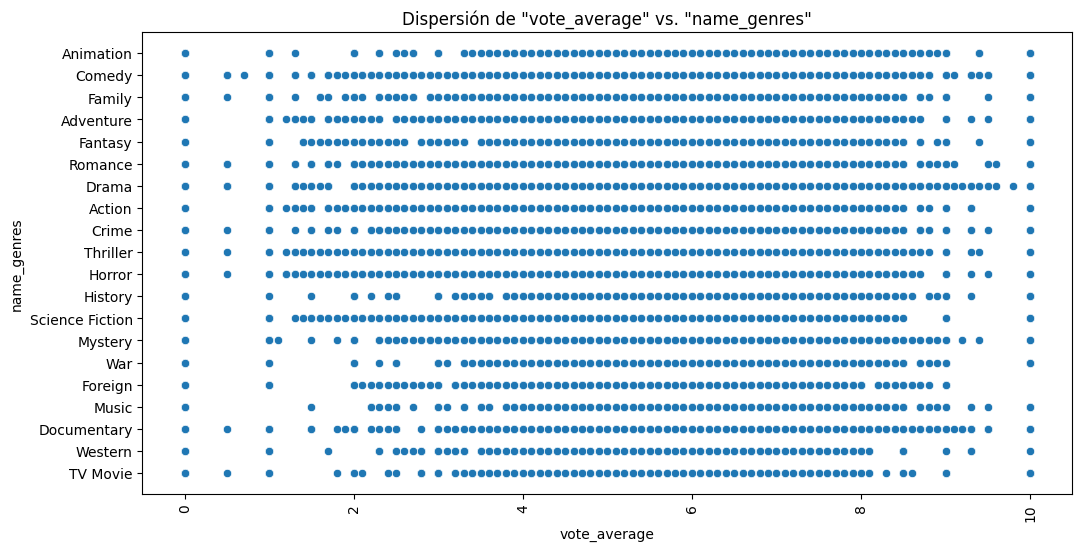

In [10]:

# Combinar los datasets de películas y Género en función del 'id_movie'
merged_df = pd.merge(mov_df, gen_df,  left_on='id', right_on='id_movie', how='inner')

# Análisis bivariable entre 'vote_average' y 'name_genres' usando un gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='vote_average', y='name_genres')
plt.xticks(rotation=90)
plt.title('Dispersión de "name_genres" vs. "vote_average"')
plt.show()


In [ ]:
def limpiar_descripcion(descripcion):
  # Convertir toda la descripción a minúsculas
  descripcion = descripcion.lower()
   # Eliminar los caracteres especiales de la descripción utilizando una expresión regular
  descripcion = re.sub(r'[^a-zA-Z0-9\s]', '', descripcion)
  # Tokenizar la descripción en palabras individuales
  palabras = word_tokenize(descripcion)
  # Lematizar cada palabra de la descripción para obtener su forma base (lemmatization)
  palabras_lemmatizadas = [lemmatizer.lemmatize(palabra) for palabra in palabras]
  # Unir las palabras lematizadas en una sola cadena de texto nuevamente
  descripcion_limpia = ' '.join(palabras_lemmatizadas)
  # Devolver la descripción limpia
  return descripcion_limpia

# Aplicar la función 'limpiar_descripcion' a la columna 'overview' del DataFrame 'merged'
merged['overview_clean'] = merged['overview'].apply(limpiar_descripcion)